In [1]:
# prompt: load from sklearn the breast cancer dataset

from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name = 'target')


In [2]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# prompt: PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
x = StandardScaler().fit_transform(X)

# Apply PCA with the desired number of components
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2','PC3','PC4','PC5'])

# Concatenate with target variable
finalDf = pd.concat([principalDf, y], axis = 1)

# Explained variance ratio
print(pca.explained_variance_ratio_)

finalDf


[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]


,PC1,PC2,PC3,PC4,PC5,target
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,0
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,0
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,0
...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,-1.177314,0.074824,0
565,3.793382,-3.584048,2.088476,2.506028,0.510723,0
566,1.256179,-1.902297,0.562731,2.089227,-1.809991,0
567,10.374794,1.672010,-1.877029,2.356031,0.033742,0


In [6]:
pca.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324])

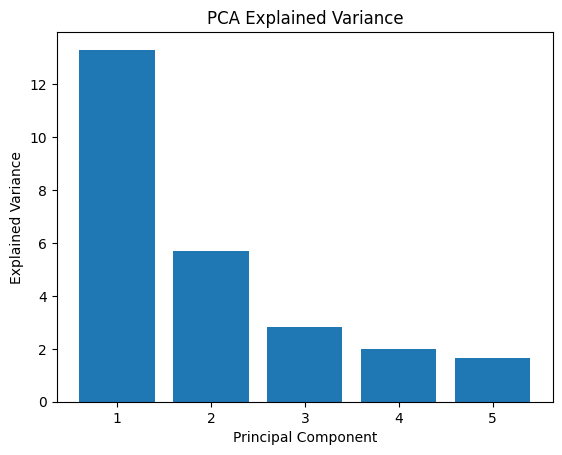

In [9]:
# prompt: plot as a barchart the pca explained variance

import matplotlib.pyplot as plt

# Assuming pca.explained_variance_ratio_ is already calculated

plt.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance')
plt.show()


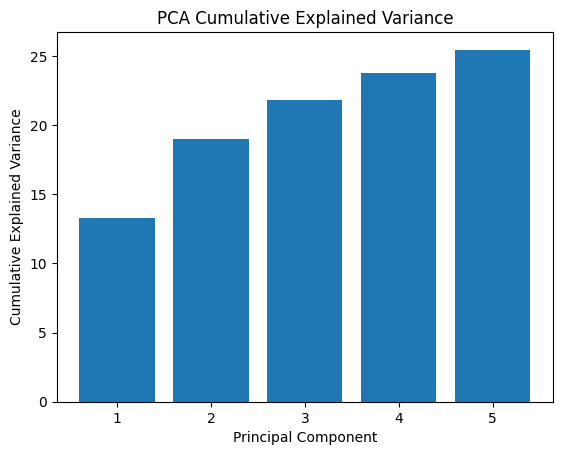

In [10]:
# prompt: plot as a bar chart the pca cumulative explained variance

# Calculate the cumulative explained variance
cumulative_explained_variance = pca.explained_variance_.cumsum()

# Plot the cumulative explained variance as a bar chart
plt.bar(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.show()


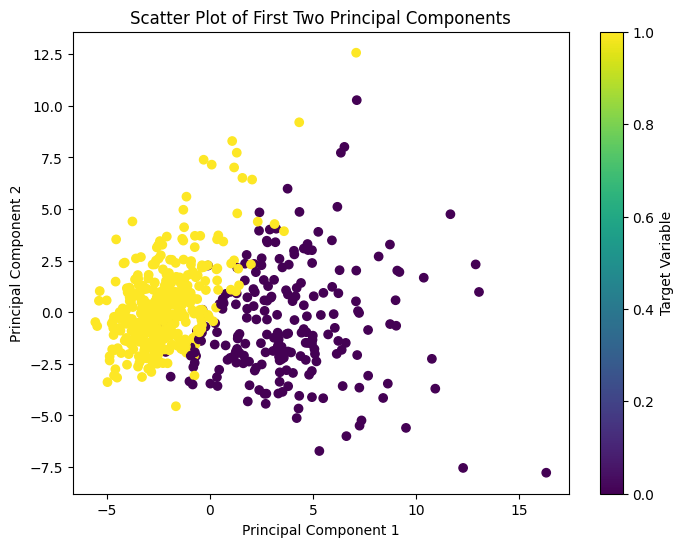

In [11]:
# prompt: scatter plot of the first 2 principal components

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(finalDf['PC1'], finalDf['PC2'], c=finalDf['target'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.colorbar(label='Target Variable')
plt.show()


In [12]:
pca.components_ #loadings

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947],
       [-0.00853124,  0.0645499 , -0.00931422,  0.02869953, -0.1042919 ,
        -0.07409157,  0.00273384, -0.02556354, -0

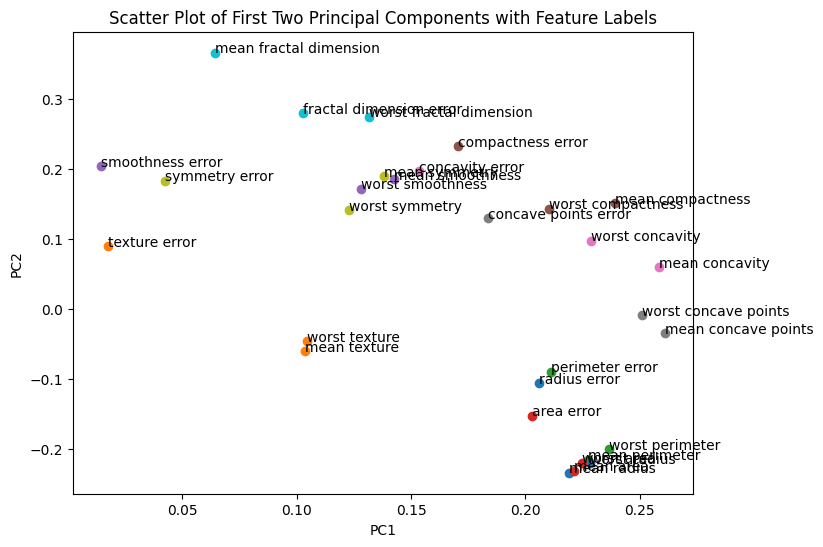

In [16]:
# prompt: scatter plot of first two items in pca.components_. Label each point with the feature name

# Scatter plot of the first two principal components with feature labels
plt.figure(figsize=(8, 6))

# Get the feature names
feature_names = X.columns

for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.scatter(x, y)
    plt.text(x, y, feature_names[i])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First Two Principal Components with Feature Labels')
plt.show()


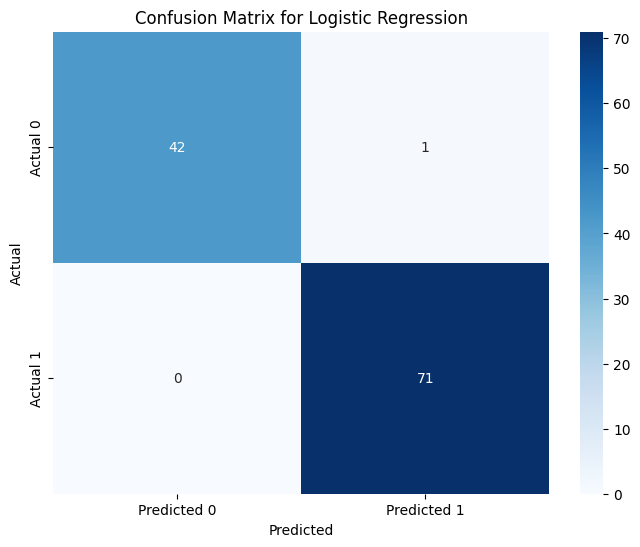

In [17]:
# prompt: logistic regression classifier using the first 2 principal components. plot the confusion matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(finalDf[['PC1', 'PC2']], finalDf['target'], test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
